In [2]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import io
import webuiapi

import csv
import  subprocess

import datetime
import pytz

import random

def get_latest_tagname():
    result = subprocess.run(["git","tag","-l"],capture_output=True, text=True).stdout
    result = str(result).split("\n")
    type(result)
    latest_tag = result[-2]
    return latest_tag


def get_current_now_datetime():
    # JSTのタイムゾーンを取得
    jst = pytz.timezone('Asia/Tokyo')
    # 現在の日時をJSTで取得
    now = datetime.datetime.now(jst)
    # 日時を指定された形式にフォーマット
    formatted_date = now.strftime('%m%d_%H%M%S')
    # print(formatted_date)
    return formatted_date

# 画像を読み込む下準備-------------------------------------------------------------------------------

# WFLWのアノテーションデータの読み込み
annotation_data_path = "/root/dataset/WFLW/WFLW_annotations/list_98pt_rect_attr_train_test/list_98pt_rect_attr_train.txt"
WFLW_images = "/root/dataset/WFLW/WFLW_images"

# 生成したデータの保存先 画像&csv
image_save_path = "/root/dataset/SD_generated_dataset/anything-v3-fp32/images"
annotation_save_path = "/root/dataset/SD_generated_dataset/anything-v3-fp32/annotations"

# CSVの読み込みとリスト化
anotation_data_lists = [] # 画像データと座標データがまとめられたリスト
with open(annotation_data_path) as f:
    anotation_data = f.readlines()

random.shuffle(anotation_data)

for i in anotation_data:
    anotation_data_lists.append(i.split(" "))

# stable diffsuion web APIの用意
api = webuiapi.WebUIApi(host='10.8.76.222', port=7860)
# anotation_data_lists

In [3]:
# anything-v3-fp32

orig_image_size_x,orig_image_size_y 1024 768
input_control_image_size (512, 512)
black_image.size (512, 512)


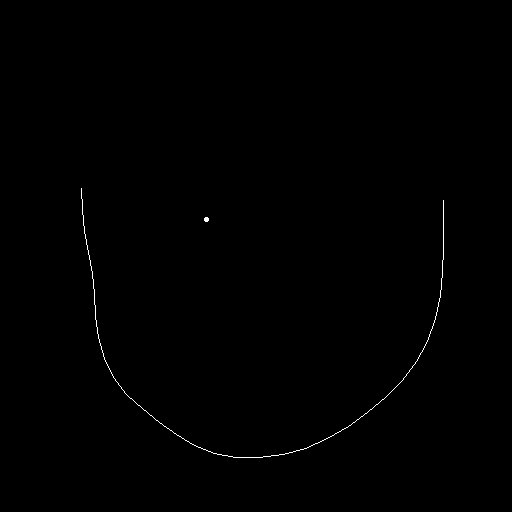

['588.845337', '154.454208', '589.131476', '161.407322', '589.880219', '168.324055', '591.183061', '175.159740', '592.340218', '182.020677', '592.888269', '188.956617', '593.286637', '195.904238', '594.239511', '202.793949', '596.129587', '209.484567', '599.123647', '215.755899', '603.332864', '221.280846', '608.458924', '225.980539', '613.955814', '230.248095', '619.622096', '234.287136', '625.615259', '237.816535', '632.072570', '240.385116', '638.896680']


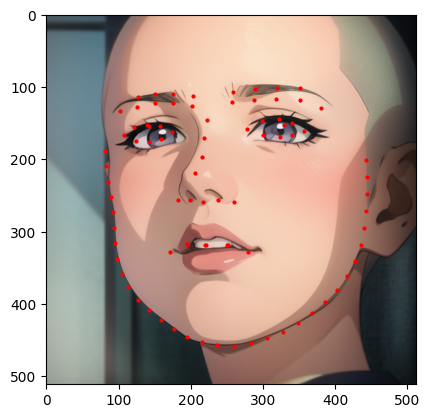

mistoonAnime_gitv1.5.5_0909_120829_0.jpg
orig_image_size_x,orig_image_size_y 1024 1862
input_control_image_size (512, 512)
black_image.size (512, 512)


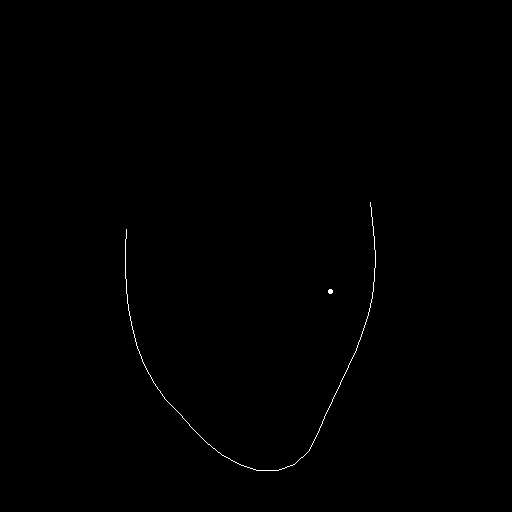

['417.735992', '168.268005', '417.556543', '179.248839', '417.593837', '190.230719', '418.063848', '201.201893', '419.174797', '212.125788', '421.105897', '222.933866', '423.995295', '233.524791', '427.990620', '243.748057', '433.255979', '253.375407', '439.776601', '262.204242', '447.106131', '270.380021', '454.738027', '278.277181', '462.492920', '286.052686', '470.874804', '293.135312', '480.374229', '298.603584', '490.867717', '301.750807', '501.804531']


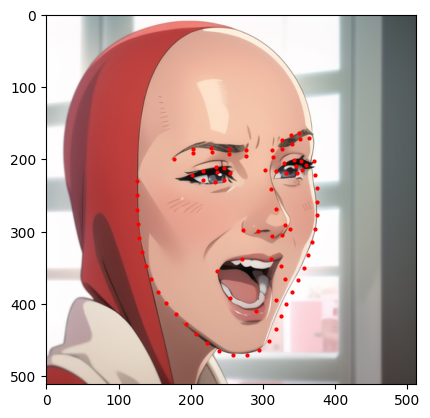

mistoonAnime_gitv1.5.5_0909_120843_0.jpg
orig_image_size_x,orig_image_size_y 1024 683
input_control_image_size (512, 512)
black_image.size (512, 512)


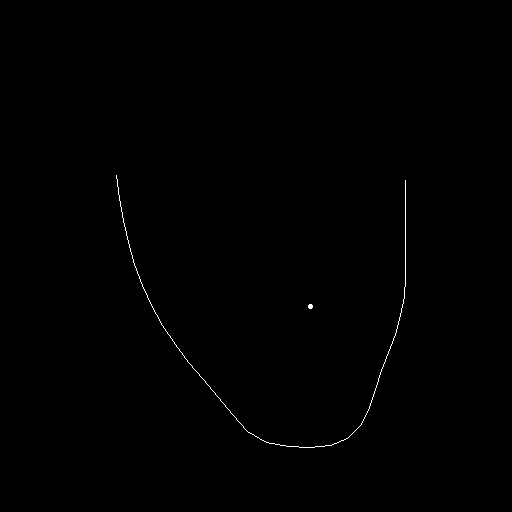

['706.710022', '603.067017', '707.697581', '609.082131', '708.796182', '615.077780', '710.118197', '621.027782', '711.775125', '626.892769', '713.872815', '632.614154', '716.450049', '638.136279', '719.450975', '643.440491', '722.818656', '648.520027', '726.504585', '653.373947', '730.400687', '658.061674', '734.365999', '662.691291', '738.264367', '667.377349', '742.350373', '671.893334', '747.497750', '675.077012', '753.500089', '676.040091', '759.590218']


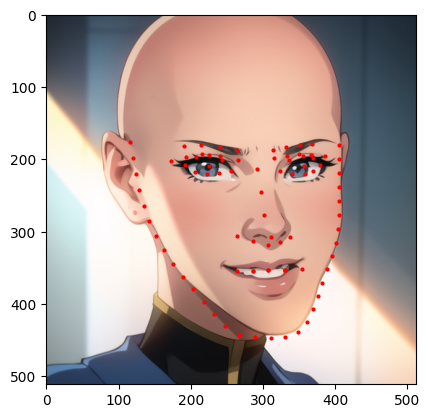

mistoonAnime_gitv1.5.5_0909_120856_0.jpg
orig_image_size_x,orig_image_size_y 1024 1146
input_control_image_size (512, 512)
black_image.size (512, 512)


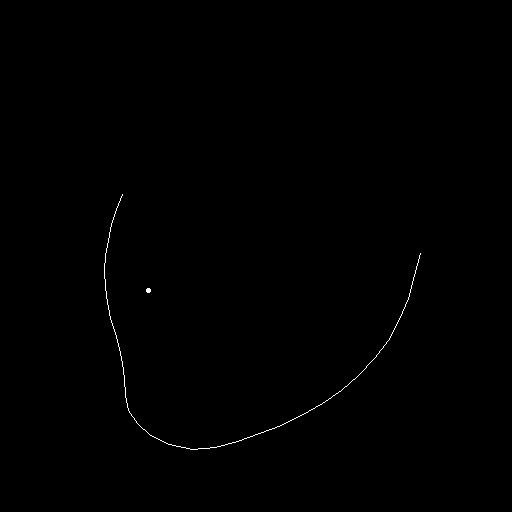

['521.110962', '518.725220', '516.162769', '532.073928', '511.737928', '545.603400', '508.263633', '559.405445', '505.981356', '573.453098', '505.058584', '587.653187', '505.687600', '601.868825', '507.767326', '615.947545', '510.890046', '629.835368', '514.618124', '643.574574', '518.499798', '657.271674', '521.763568', '671.123933', '523.283977', '685.268943', '523.708683', '699.497986', '526.972118', '713.262547', '534.814287', '725.089575', '545.272665']


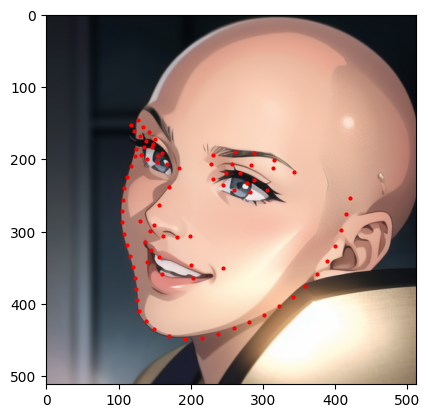

mistoonAnime_gitv1.5.5_0909_120910_0.jpg
orig_image_size_x,orig_image_size_y 1024 1373
input_control_image_size (512, 512)
black_image.size (512, 512)


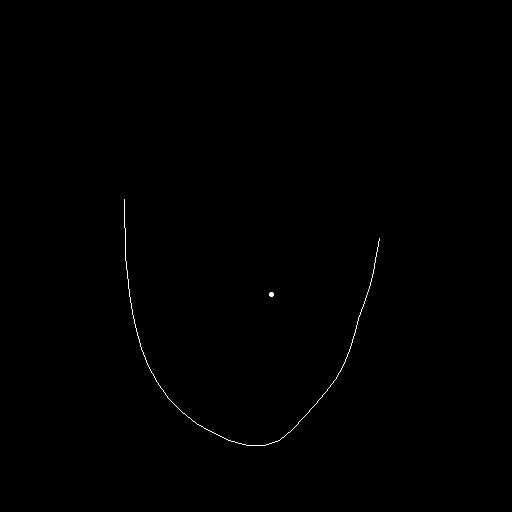

In [5]:
# パラメータ類----------------------------------------------------------------------------------------
load_image_num = range(5) # csvの列ナンバー
# 画像のクロップマージンの画像サイズに対する割合
mergin_per = 0.2
input_control_image_size = (512,512)
# プロンプトの用意&生成画像サイズ
prompts = [
    "Anime,anime,face,skin head,bald,1girl,best, winning, detailed, face,  Masterpiece, Award, Quality, solo, quality,1girl,ear",
    # "short hair,quality, eyes, best, winning, detailed, face,  Masterpiece, Award, Quality, solo, quality,1girl, masterpiece, anime,Anime,(perfect anime illustration),kawaii,Kawaii,anime,Anime",
    # "quality,Boy, eyes, best, winning, detailed, face,  Masterpiece, Award, Quality, solo, quality,1boy, masterpiece, anime,Anime,(perfect anime illustration),boy"
]
negative_prompt = "(deformed, distorted, disfigured:1.3), poorly drawn, bad anatomy, wrong anatomy, (mutated hands and fingers:1.4), disconnected limbs, mutation, mutated,(worst quality, low quality:1.3), twins, lowers, jpeg artifacts, low quality"
# negative_prompt = "lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, lowres, bad anatomy, bad hands, text, error, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, ugly, duplicate, morbid, mutilated, extra fingers, mutated hands, poorly drawn hands, poorly drawn feet, poorly drawn face,bad hands, bad arms, missing fingers, missing arms, missing hands, missing digit, missing limbs, extra digit, fewer digits, fused hands, poorly drawn hands, poorly drawn hands, three hands, fewer digits, fused fingers, extra fingers, extra limbs, extra arms, malformed limbs, {{bookshelf}}, {{holding pen}}, {{{curtains}}}"
# negative_prompt = "lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, ugly, duplicate, morbid, mutilated, tranny, trans, trannsexual, hermaphrodite, extra fingers, mutated hands, poorly drawn hands, poorly drawn feet, poorly drawn face, out of frame, body out of frame, mutation, deformed, bad anatomy, bad proportions, extra limbs, cloned face, disfigured. more than 2 nipples, bad anatomy, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, mutated hands, fused fingers, too many fingers, tiling, grainy, 2girls, bad fingers, 6 fingers, {{{{{{{{bad fingers}}}}}}}}"
generate_image_size = (512,512)
# Unitの重みの設定
unit1_weight = 1.0
unit2_weight = 1.6

for image_num in load_image_num:

    # 入力データの加工--------------------------------------------------------------------------------------
    image_name = anotation_data_lists[image_num][-1].replace("\n","")
    image_path = WFLW_images + "/" + image_name
    image = Image.open(image_path)
    orig_image_size_x,orig_image_size_y = image.size #オリジナルの画像データのサイズ（ランドマークの座標変換のときに使う）
    print("orig_image_size_x,orig_image_size_y",orig_image_size_x,orig_image_size_y)
    bounding_box_data = tuple([int(bdbox) for bdbox in anotation_data_lists[image_num][-11:-7]])
    face_width = bounding_box_data[2]-bounding_box_data[0]
    face_height = bounding_box_data[3]-bounding_box_data[1]
    
    #顔の中心座標
    face_center_x = float((bounding_box_data[2]+bounding_box_data[0]) / 2)
    face_center_y = float((bounding_box_data[3]+bounding_box_data[1]) / 2)

    # コントロールネット用の画像のクロップとリサイズ
    margin_pix = float((face_width+face_height) / 2 * mergin_per)
    half_long_side = max(face_width,face_height) / 2
    image_size = margin_pix + half_long_side
    crop_coordinates = (
        face_center_x-image_size,
        face_center_y-image_size,
        face_center_x+image_size,
        face_center_y+image_size
    )
    
    input_control_image = image.crop(crop_coordinates)
    croped_image_size_x,croped_image_size_y = input_control_image.size
    input_control_image = input_control_image.resize(input_control_image_size)
    print("input_control_image_size",input_control_image.size)
    # input_control_image.show() # controlnet input用の画像の表示#################################
    
    #scribble用の白黒画像の作成と表示---------------------------------------------------------------------------------
    black_image = Image.new('RGB', input_control_image.size, "black")
    draw = ImageDraw.Draw(black_image)
    
    orig_landmark_coordinates = anotation_data_lists[image_num][0:196]
    transformed_coordinates_scribble = []
    for landmark_num in range(0, len(orig_landmark_coordinates),2):  
        transformed_x = (float(orig_landmark_coordinates[landmark_num])-crop_coordinates[0]) * (input_control_image_size[0] / croped_image_size_x)
        transformed_y = (float(orig_landmark_coordinates[landmark_num+1])-crop_coordinates[1]) * (input_control_image_size[1] / croped_image_size_y)
        transformed_coordinates_scribble.append((transformed_x,transformed_y))
        
    # 使用する点と線の表示
    draw.line(transformed_coordinates_scribble[0:33], fill="white",width=1) # 輪郭
    # draw.line(transformed_coordinates_scribble[33:38], fill="white",width=1) # 左眉
    # draw.line(transformed_coordinates_scribble[42:47], fill="white",width=1) # 右眉
    # draw.line(transformed_coordinates_scribble[51:55], fill="white",width=1) # 鼻筋 決定s
    # for i in range(51,55):
    draw.ellipse((transformed_coordinates_scribble[54][0]-3, 
                transformed_coordinates_scribble[54][1]-3, 
                transformed_coordinates_scribble[54][0]+3, 
                transformed_coordinates_scribble[54][1]+3), 
                fill=(255, 255, 255), 
                outline=(0, 0, 0))
    # draw.line(transformed_coordinates_scribble[55:60], fill="white",width=1) # 鼻下
    # draw.line(transformed_coordinates_scribble[88:96], fill="white",width=1) # 口
    # draw.line([transformed_coordinates_scribble[88],transformed_coordinates_scribble[95]], fill="white",width=1) # 口
    print("black_image.size",black_image.size)
    black_image.show()
    
    # イラスト生成用のコード------------------------------------------------------------------------------

    # 生成画像のランドマーク用意
    genimage_keypoints_x = [keypoint[0]*(generate_image_size[0] / input_control_image_size[0]) for keypoint in transformed_coordinates_scribble]
    genimage_keypoints_y = [keypoint[1]*(generate_image_size[1] / input_control_image_size[1]) for keypoint in transformed_coordinates_scribble]
    x_np = np.array(genimage_keypoints_x)
    y_np = np.array(genimage_keypoints_y)
    # print(x_np)
    # print(y_np)

    unit1 = webuiapi.ControlNetUnit(
        input_image=black_image,
        # module='black_image',
        model='control_v11p_sd15_scribble_fp16 [4e6af23e]',
        weight=unit1_weight
    )

    unit2 = webuiapi.ControlNetUnit(
        input_image=input_control_image,
        # input_image=black_image_openpose,
        module='openpose_faceonly',
        model='control_v11p_sd15_openpose [cab727d4]',
        weight=unit2_weight
    )
    # ig,ax = plt.subplots(1)
    r = api.controlnet_detect(images=[input_control_image], module='openpose_faceonly')
    # ax.imshow(r.image)

    for prompt_num,prompt in enumerate(prompts):
        r = api.txt2img(
            prompt=prompt,
            negative_prompt=negative_prompt,
            width=generate_image_size[0],
            height=generate_image_size[1],
            steps=38,
            controlnet_units=[unit2,unit1]
        )       

        fig,ax = plt.subplots(1)
        ax.imshow(r.image)

        # 点の表示
        plt.plot(x_np[0:33], y_np[0:33], 'o',color='red',markersize=2) # 輪郭
        print(orig_landmark_coordinates[0:33])
        plt.plot(x_np[33:38], y_np[33:38], 'o',color='red',markersize=2) # 上右眉
        plt.plot(x_np[38:42], y_np[38:42], 'o',color='red',markersize=2) # 下右眉
        plt.plot(x_np[42:47], y_np[42:47], 'o',color='red',markersize=2) # 上左眉
        plt.plot(x_np[47:51], y_np[47:51], 'o',color='red',markersize=2) # 下左眉
        plt.plot(x_np[51:55], y_np[51:55], 'o',color='red',markersize=2) # 鼻筋
        plt.plot(x_np[55:60], y_np[55:60], 'o',color='red',markersize=2) # 鼻下
        plt.plot(x_np[60:68], y_np[60:68], 'o',color='red',markersize=2) # 右目
        plt.plot(x_np[68:76], y_np[68:76], 'o',color='red',markersize=2) # 左目
        plt.plot(x_np[88:96], y_np[88:96], 'o',color='red',markersize=2) # 口
        plt.plot(x_np[96], y_np[96], 'o',color='red',markersize=2) # 右目の光彩
        plt.plot(x_np[97], y_np[97], 'o',color='red',markersize=2) # 右目の光彩
        # plt.plot([x_np[88],x_np[95]], [y_np[88],y_np[95]], 'o',color='red',markersize=2) # 口
        plt.show()
            
        # print(writting_annotation_coordinate_xy)
        # print(genimage_keypoints_x[keypoint])
        # print(genimage_keypoints_y[keypoint])
        
        # 画像とアノテーションデータの保存-------------------------------------------------------------------
        # 生成された画像の保存
        # 画像の名前、モデル、gitのタグ、日付、プロンプトの番号
        result_current_model = api.util_get_current_model()
        current_model = result_current_model.split("_")[0]
        latest_tagname = get_latest_tagname()
        current_datetime = get_current_now_datetime()
        save_genimg_name = f"{current_model}_git{latest_tagname}_{current_datetime}_{prompt_num}.jpg"
        print(save_genimg_name)      
        # r.image.save(f"{image_save_path}/{save_genimg_name}")
        
        # アノテーションデータの保存
        # csv_write_data_list = [f"{save_genimg_name}",f"{image_name}",f"{result_current_model}"]
        # for keypoint in range(98):
        #     csv_write_data_list.append(genimage_keypoints_x[keypoint])
        #     csv_write_data_list.append(genimage_keypoints_y[keypoint])
        # # print(csv_write_data_list)
        # # # アノテーションデータの保存
        # with open(f"{annotation_save_path}/annotations.csv","a") as f:
        #     writer = csv.writer(f)
        #     writer.writerow(csv_write_data_list)